In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

import tensorflow.keras as keras
import tensorflow.keras.backend as K

import os
import os.path as osp
import sys
sys.path.append("e:\\projects\\EMD_VAE")

import numpy as np
#from scipy import linalg as LA

import matplotlib
import matplotlib.pyplot as plt

# %load_ext autoreload
# %autoreload 2

from utils.tf_sinkhorn import ground_distance_tf_nograd, sinkhorn_knopp_tf_scaling_stabilized_class
import utils.VAE_model_tools
from utils.VAE_model_tools import build_and_compile_annealing_vae, betaVAEModel, reset_metrics

import pandas
import matplotlib.pyplot as plt

import h5py
import pickle


1 Physical GPUs, 1 Logical GPUs


In [3]:
sys.path.append("e:\\projects\\EMD_VAE")

In [8]:
this = np.loadtxt('E:\projects\EMD_VAE\compression_project\data\B_background_1.dat',skiprows=1)

In [9]:
this.shape

(18606151, 6)

In [61]:
this = this[np.abs(this[:,3])<5]

In [62]:
numparticles = np.array([np.sum(this[:,0]==i) for i in range(1000)])

In [64]:
events = [this[this[:,0]==i] for i in range(1000)]

In [68]:
sortedpts = []
htfrac100 = []
htfrac50 = []
hts = []
for event in events:
    pts = np.flip(np.sort(event[:,2]))
    ht = np.sum(pts)
    hts += [ht]
    htfrac50 += [np.sum(pts[:50])/ht]
    htfrac100 += [np.sum(pts[:100])/ht]

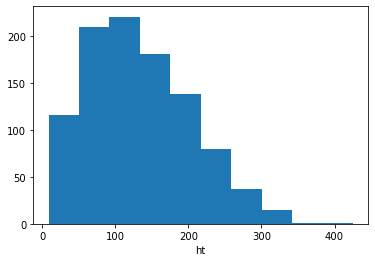

In [72]:
plt.hist(hts)
plt.xlabel("ht")
plt.show()

(array([ 59., 198., 250., 164.,  85.,  82.,  57.,  51.,  32.,  22.]),
 array([0.28006493, 0.35205844, 0.42405194, 0.49604545, 0.56803896,
        0.64003246, 0.71202597, 0.78401948, 0.85601299, 0.92800649,
        1.        ]),
 <a list of 10 Patch objects>)

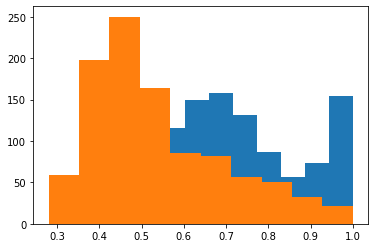

In [67]:
plt.hist(htfrac100)
plt.hist(htfrac50)

In [54]:
htfrafc

117.6284684

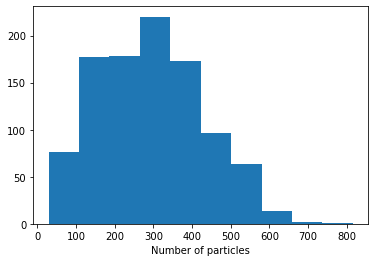

In [63]:
plt.hist(numparticles)
plt.xlabel("Number of particles")
plt.show()

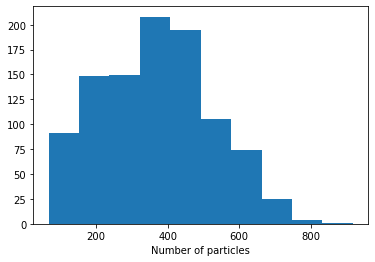

In [35]:
plt.hist(numparticles)
plt.xlabel("Number of particles")
plt.show()

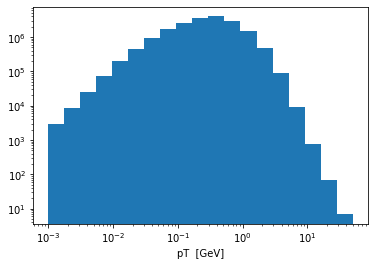

In [34]:
plt.hist(this[:,2],bins = np.logspace(np.log10(1e-3),np.log10(50),20))
plt.xlabel("pT  [GeV]")
plt.semilogy()
plt.semilogx()
plt.show()

In [26]:
this[:,2]

array([0.723036, 0.882039, 1.18484 , ..., 0.325054, 1.35178 , 3.02086 ])

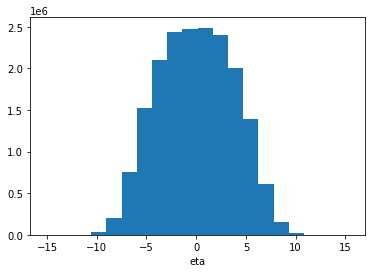

In [60]:
plt.hist(this[:,3],bins=20)
plt.xlabel("eta")
plt.show()

In [40]:
events[0][:,2]

array([7.23036e-01, 8.82039e-01, 1.18484e+00, 1.54016e-01, 2.18430e-01,
       1.59151e+00, 9.55280e-01, 7.60555e-01, 1.00221e+00, 7.31692e-01,
       2.03407e+00, 9.42102e-01, 6.99273e-01, 1.11758e+00, 4.37963e-01,
       2.91295e-01, 2.22179e-01, 1.93440e-01, 1.41284e+00, 6.72350e-01,
       4.63252e-01, 6.79558e-01, 3.89643e-01, 8.07417e-01, 3.85358e-01,
       3.47518e-01, 3.33947e-01, 5.64448e-01, 1.57546e+00, 4.26522e-01,
       3.81816e-01, 5.01674e-01, 6.14850e-01, 6.19602e-01, 2.35876e+00,
       1.18050e+00, 9.95240e-01, 6.87838e-01, 1.12325e+00, 2.02571e+00,
       1.31754e+00, 8.67425e-01, 1.80223e+00, 3.71371e-01, 7.08087e-01,
       4.65086e-01, 3.43770e-01, 1.33318e-01, 1.08782e+00, 1.24112e-01,
       1.33506e+00, 5.61109e-01, 8.17664e-01, 6.26076e-01, 4.45237e-01,
       6.10369e-01, 3.42795e-01, 3.82287e-01, 2.75206e-01, 2.92719e+00,
       1.12047e+00, 1.34919e-01, 4.53981e-01, 1.18735e+00, 8.67343e-01,
       5.12667e-01, 5.48279e-01, 1.23608e+00, 3.01985e-01, 1.794